## <center>CSELE103: Intelligent Systems | Midterm Output</center>
<center>Model 1</center>

---
<center> <b>Student:</b> Grimaldo James Leo C. </center>
<center> <b>Program:</b> Bachelor of Science in Computer Science
Specialization Track in Data Science </center>
<center> <b>Faculty:</b> RODRIGO JR. C. BELLEZA </center>
<center> <b>Section:</b> M030 </center>


## <center>Breast Cancer Dataset</center>
---
<b>About Dataset</b>
- Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

<b>Dataset Instructions</b>
- The key challenge against its detection is how to classify tumors into **malignant (cancerous)** or **benign(non-cancerous)**. We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Note: Clustering: KMeans method is used for this project

**Steps:**
1. EDA (Exploratory Data Analysis)
2. Data Wrangling (Data Cleaning) *if applicable*
3. Model Building
4. Model Performance Evaluation
5. Result and Conclusion



---


##### Step 1: EDA (Exploratory Data Analysis)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, QuantileTransformer, normalize, OrdinalEncoder
from sklearn.cluster import KMeans

In [3]:
# Import and Read Dataset Using Pandas
breast_cancer_df = pd.read_csv('data.csv')
breast_cancer_df['diagnosis']


0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [4]:
enc = OrdinalEncoder()
enc.fit(breast_cancer_df[['diagnosis']].values)


OrdinalEncoder()

Seperate X, Y variables

convert Y into ordinal data, M -> 1, and B -> 0

In [5]:
X_breast_cancer_df = breast_cancer_df.drop(columns=['id', 'diagnosis'], axis=1, inplace=False)
Y_breast_cancer_df = pd.DataFrame(data = enc.transform(breast_cancer_df[['diagnosis']].values), columns=['diagnosis_T'])
Y_breast_cancer_df.head(20)

,diagnosis_T
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0


In [6]:
# Describe Dataset
X_breast_cancer_df.describe()

   

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Described dataset Analysis**: There are equal counts of features therefore no missing or null values.

In [7]:
for feature in list(X_breast_cancer_df.columns):
    feature_count = X_breast_cancer_df[[f'{feature}']].count()[0]
    print(f'{feature}: {feature_count} values')

radius_mean: 569 values
texture_mean: 569 values
perimeter_mean: 569 values
area_mean: 569 values
smoothness_mean: 569 values
compactness_mean: 569 values
concavity_mean: 569 values
concave_points_mean: 569 values
symmetry_mean: 569 values
fractal_dimension_mean: 569 values
radius_se: 569 values
texture_se: 569 values
perimeter_se: 569 values
area_se: 569 values
smoothness_se: 569 values
compactness_se: 569 values
concavity_se: 569 values
concave_points_se: 569 values
symmetry_se: 569 values
fractal_dimension_se: 569 values
radius_worst: 569 values
texture_worst: 569 values
perimeter_worst: 569 values
area_worst: 569 values
smoothness_worst: 569 values
compactness_worst: 569 values
concavity_worst: 569 values
concave_points_worst: 569 values
symmetry_worst: 569 values
fractal_dimension_worst: 569 values


In [8]:
X_bc_mean = X_breast_cancer_df.iloc[:,0:10]
X_bc_se = X_breast_cancer_df.iloc[:,10:20]
X_bc_worst = X_breast_cancer_df.iloc[:,20:30]


In [9]:
def data_plots(data_frame):
    red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

    fig, axs = plt.subplots(1, len(data_frame.columns), figsize=(20,10))

    for i, ax in enumerate(axs.flat):
        ax.boxplot(data_frame.iloc[:,i], flierprops=red_circle)
        ax.set_title(data_frame.columns[i], fontsize=8, fontweight='bold')
        ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()

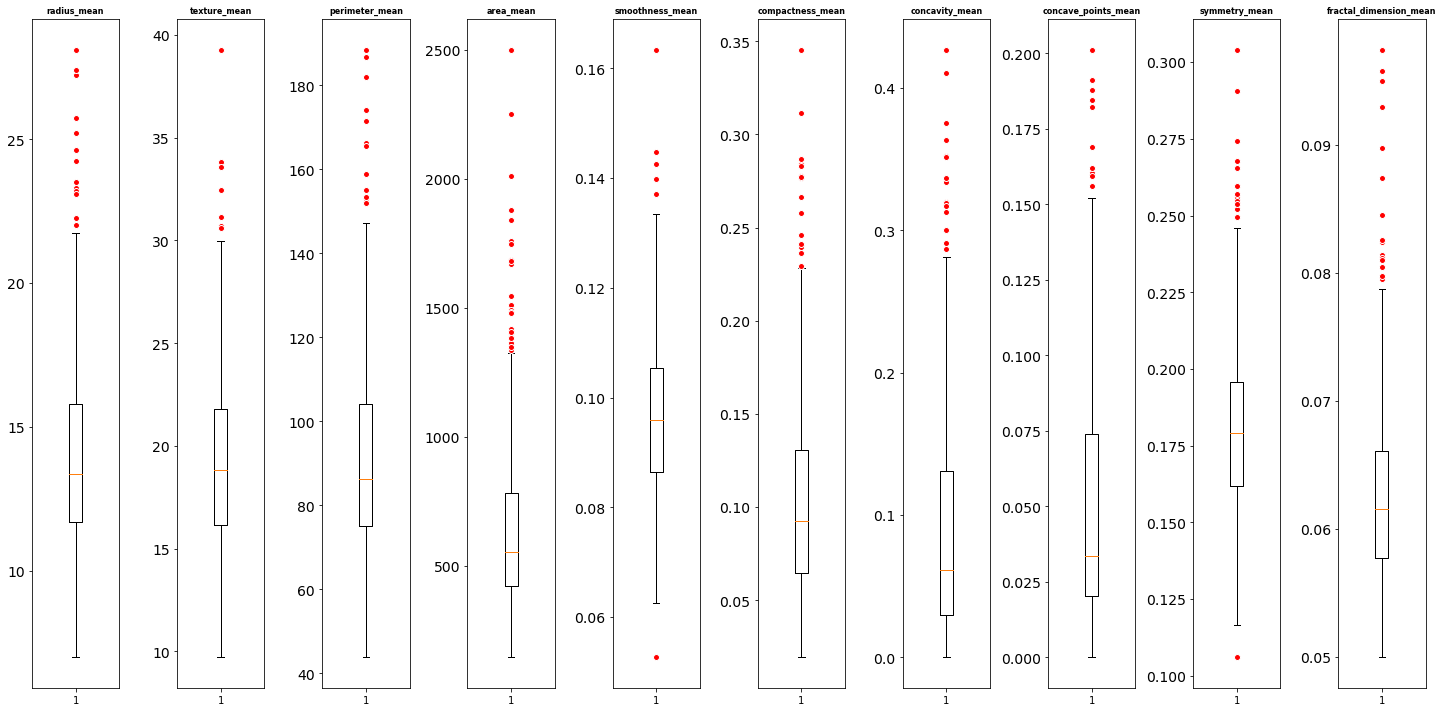

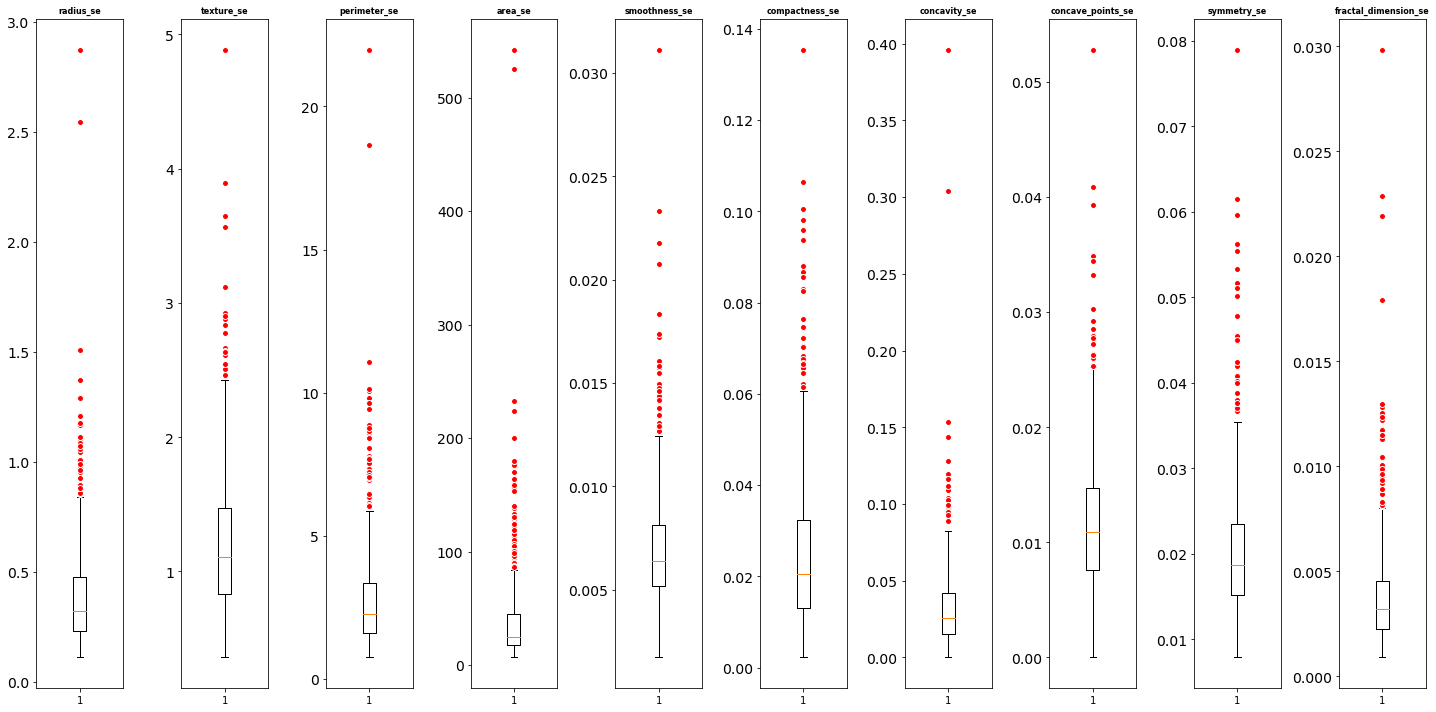

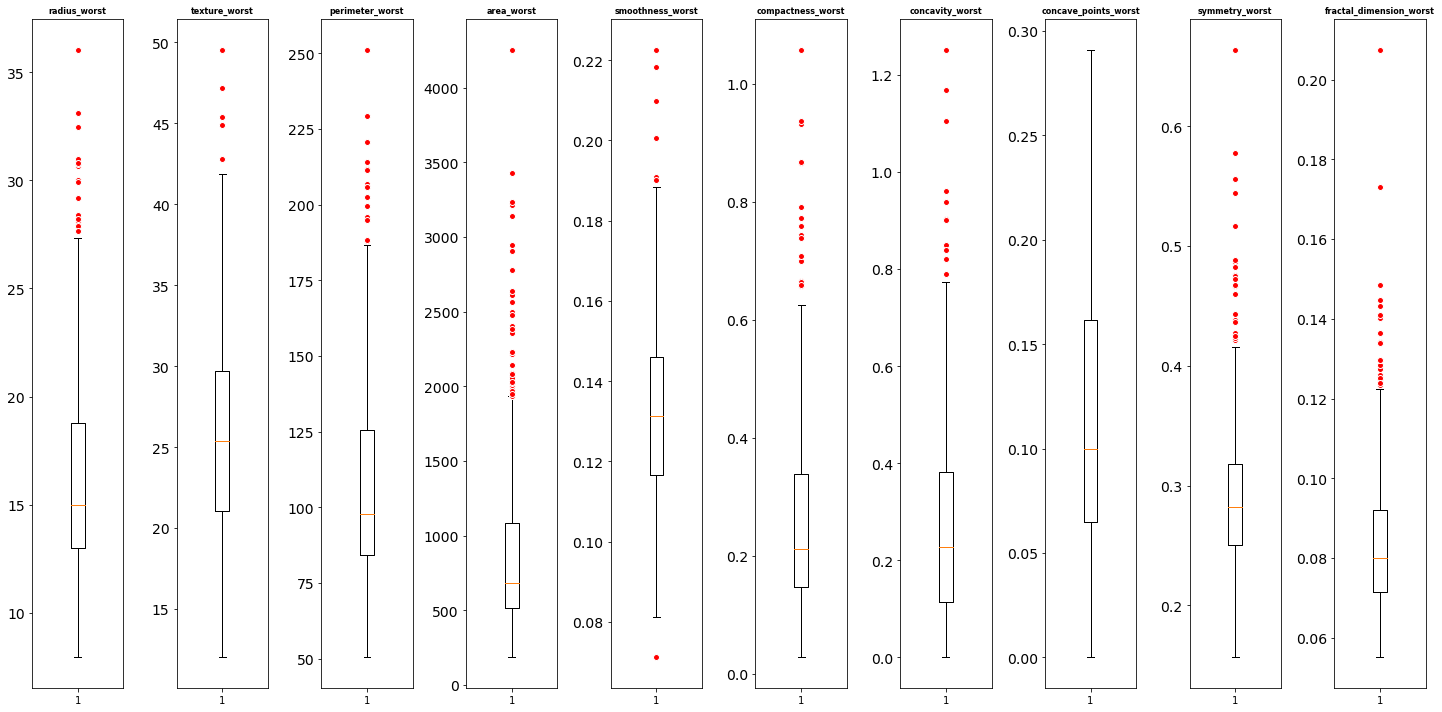

In [10]:

ploty_X_bc_mean = data_plots(X_bc_mean)
ploty_X_bc_se = data_plots(X_bc_se)
ploty_X_bc_worst = data_plots(X_bc_worst)

**Boxplot Analysis:** With the given results of boxplots, we were able to visualize amount of outliers from the given dataset, *however Some outliers represent natural variations in the population, and they should be left as is in your dataset.* These are called true outliers (Scribbr, 2022). Each humans has different sizes of breast and for sure the data collected does not varies in one cup size.

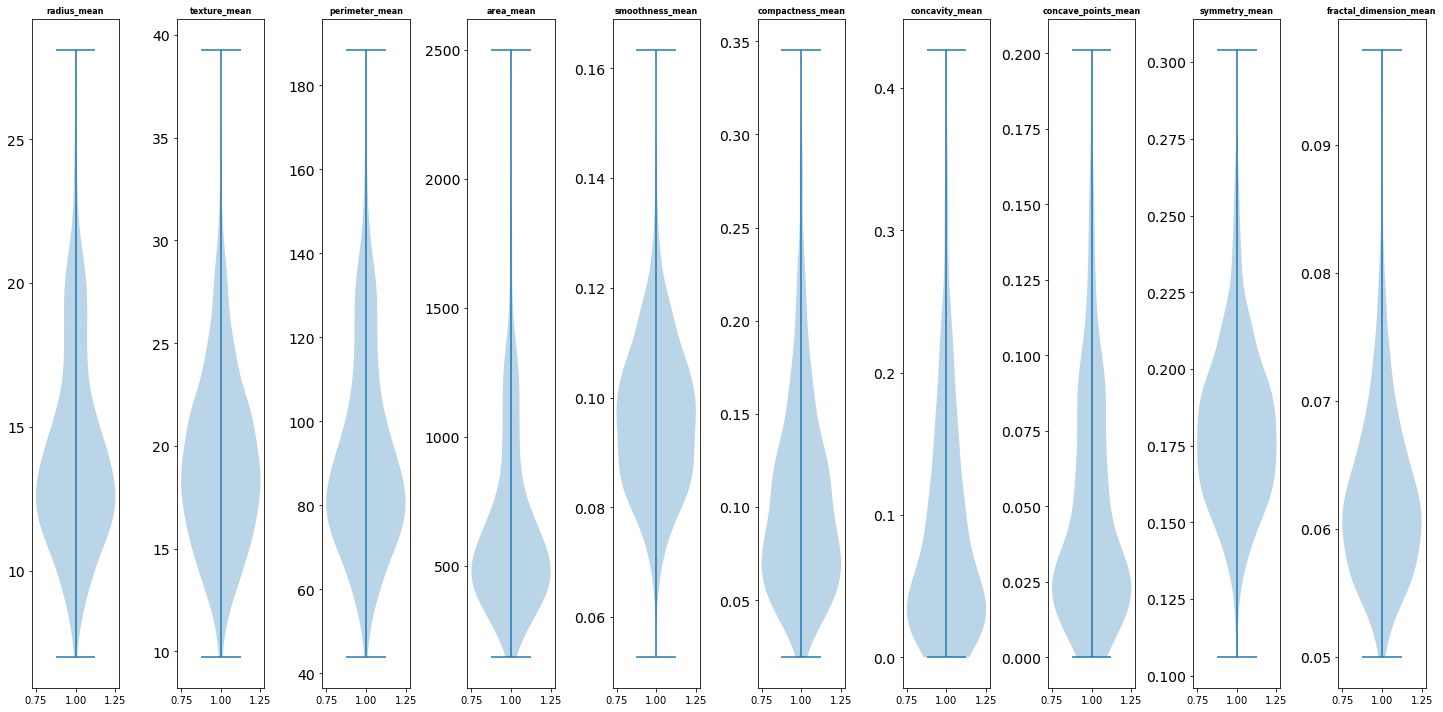

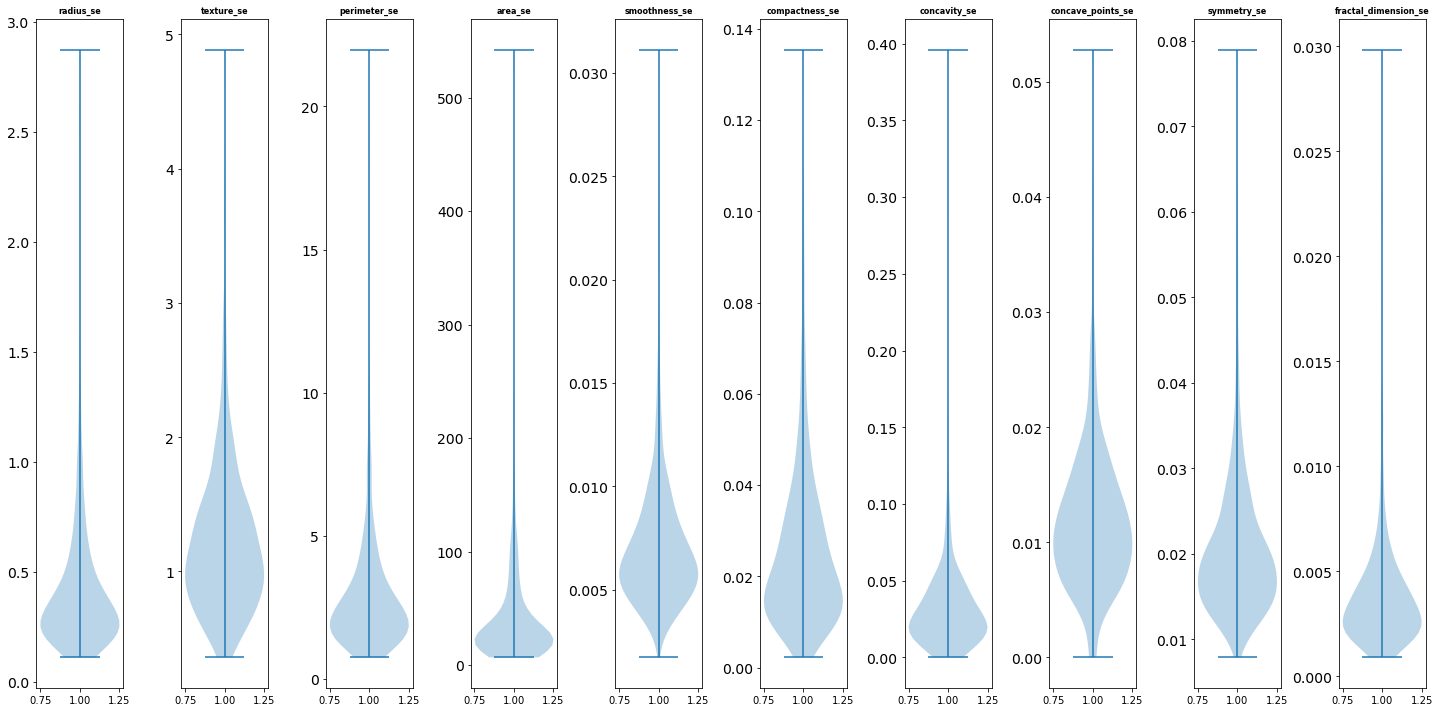

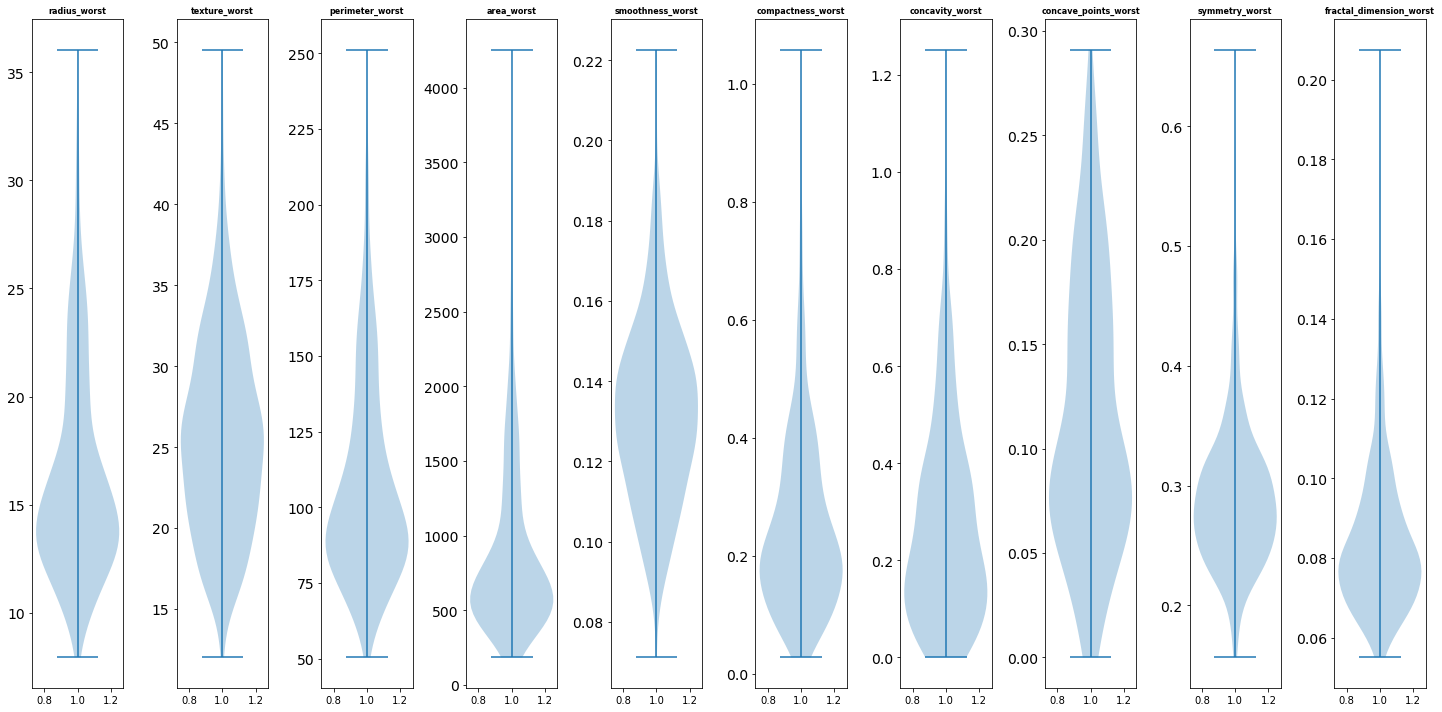

In [11]:
def v_data_plots(data_frame):
    red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

    fig, axs = plt.subplots(1, len(data_frame.columns), figsize=(20,10))

    for i, ax in enumerate(axs.flat):
        ax.violinplot(data_frame.iloc[:,i])
        ax.set_title(data_frame.columns[i], fontsize=8, fontweight='bold')
        ax.tick_params(axis='y', labelsize=14)

    plt.tight_layout()

v_data_plots(X_bc_mean)
v_data_plots(X_bc_se)
v_data_plots(X_bc_worst)

**Violin Plot Analysis:** Violin plots show bimodality and multimodality of the data, this explains the well varied data or different sizes of breast.

---

<BarContainer object of 2 artists>

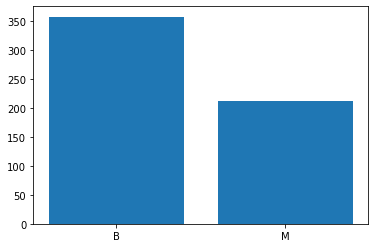

In [12]:
cluster_destribution = pd.pivot_table(breast_cancer_df, index=breast_cancer_df['diagnosis'], aggfunc='count')
cluster_destribution = cluster_destribution.reset_index()
cluster_destribution
plt.bar(cluster_destribution['diagnosis'], height=cluster_destribution['area_mean'])

**Class Distribution Analysis:** Based on the class distribution shown in the bar graph above, there are more benign data rather than malignant. However there is still sufficient amount of data for malignant to be feed to the model.

---

##### **Step 2: Data Wrangling (Data Cleaning)**
**Feature Engineering:**
- Feature Scaling
- PCA (Principal Component Analysis)

**Feature Scaling**

In [13]:
scaler = StandardScaler()
X_breast_cancer_df = pd.DataFrame(data=scaler.fit_transform(X_breast_cancer_df), columns=list(X_breast_cancer_df.columns))
X_breast_cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


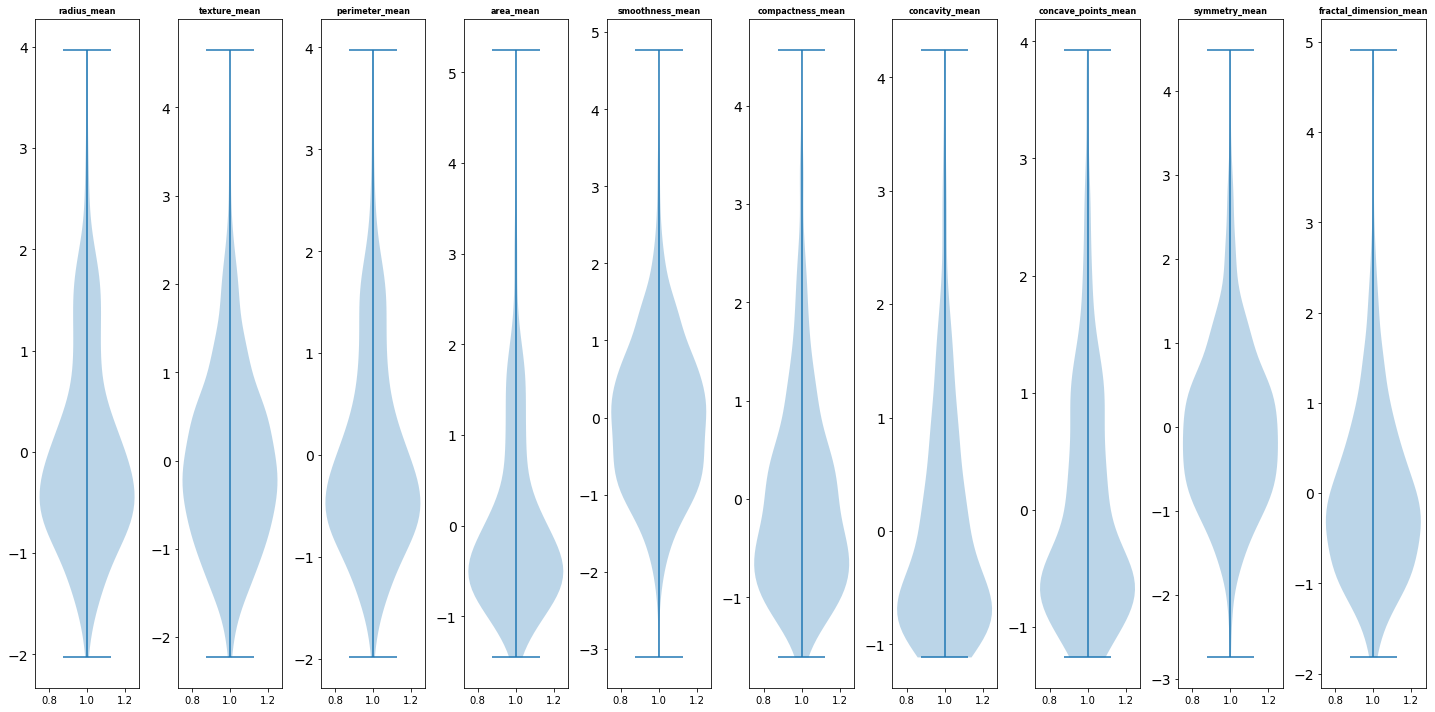

In [14]:
v_data_plots(X_breast_cancer_df.iloc[:,0:10])

**Analysis after Applying Standard Scaler:** if we look at the number line compared to the number line in above violin plots the number line are now almost same.

---

**PCA(Principal Component Analysis)**

In [15]:
from sklearn.decomposition import PCA

X_bc_in_PCA = PCA(n_components=2).fit_transform(X_breast_cancer_df)
X_bc_in_PCA

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

<table>
  <tr>
    <th>Diagnosis</th>
    <th>Value</th>
  </tr>
  <tr>
    <td>benign(non-cancerous)</td>
    <td>0</td>
  </tr>
  <tr>
    <td>malignant (cancerous)</td>
    <td>1</td>
  </tr>
</table>

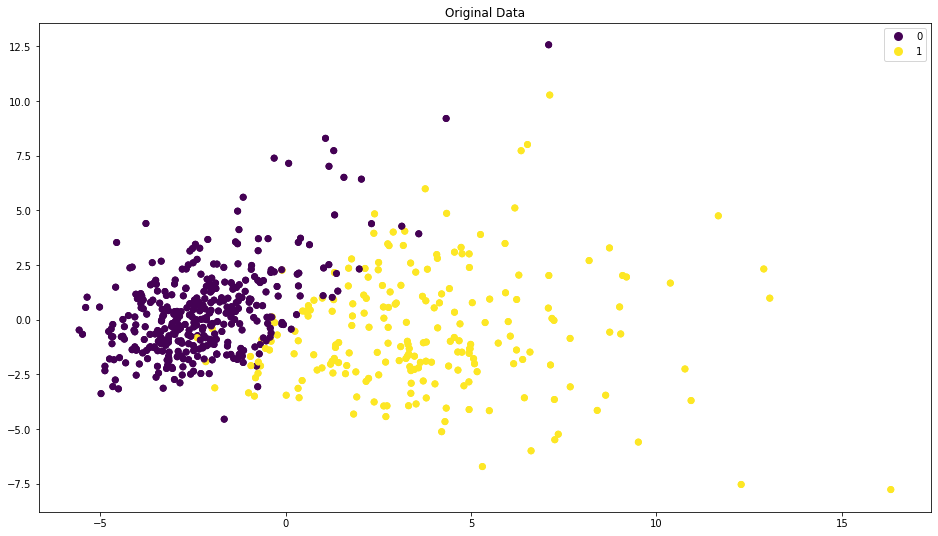

In [16]:

plt.figure(figsize=(16, 9))

label1 = plt.scatter(x=X_bc_in_PCA[:,0], y=X_bc_in_PCA[:, 1], c=Y_breast_cancer_df['diagnosis_T'], label='label1')
label2 = plt.scatter(x=X_bc_in_PCA[:,0], y=X_bc_in_PCA[:, 1], c=Y_breast_cancer_df['diagnosis_T'], label='label2')
lp = lambda i: plt.plot([],color=label1.cmap(label1.norm(i)), ms=np.sqrt(81), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
plt.legend(handles=[lp(i) for i in np.unique(Y_breast_cancer_df["diagnosis_T"])])
plt.title("Original Data")
plt.show()

---

##### Step 3: Model Building

- Splitting the data.

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_breast_cancer_df, Y_breast_cancer_df, test_size = 0.33, random_state = 42)

In [18]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
172,0.378508,-1.721948,0.433773,0.233247,2.087974,0.969539,1.436297,1.567780,0.563638,1.118828,...,0.522016,-1.406518,0.528365,0.389232,0.908780,0.661808,1.491126,1.036837,0.509996,0.945071
407,-0.362769,0.484112,-0.384677,-0.399281,-1.483819,-0.401411,-0.345755,-0.780246,-0.845627,-0.234983,...,-0.387077,0.217034,-0.465589,-0.412728,-1.681045,-0.385914,-0.424046,-0.892221,-0.667748,-0.134983
56,1.443561,-0.167467,1.381147,1.413834,0.636199,0.423736,0.546150,1.058091,0.384741,-0.451877,...,2.044072,0.401048,1.871706,2.222734,1.316453,0.616006,0.555129,1.438819,1.029304,-0.055738
497,-0.470694,-0.460677,-0.474471,-0.497118,-0.503871,-0.531418,-0.661764,-0.650760,-1.042777,-0.331381,...,-0.457485,-0.217758,-0.430144,-0.480408,-0.209036,-0.023315,-0.332893,-0.141702,0.217178,-0.406520
301,-0.473535,0.139706,-0.475295,-0.522146,-0.843330,-0.055736,-0.257368,-0.462464,-0.111787,-0.043607,...,-0.581734,-0.424570,-0.569839,-0.578851,-1.199727,-0.244691,-0.392382,-0.584035,-0.349045,-0.349442


In [19]:
k_means = KMeans(n_clusters=2, init="k-means++")
k_means.fit(X_train, y_train)

KMeans(n_clusters=2)

In [20]:
y_pred = k_means.predict(X_train)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [21]:
comparison_data = {'y_train': np.array(y_train).flatten(), 'y_pred': y_pred}
prediction_comparison = pd.DataFrame(data = comparison_data)
prediction_comparison.loc[prediction_comparison['y_train'] == prediction_comparison['y_pred'], 'diff'] = prediction_comparison['y_pred']  
prediction_comparison.loc[prediction_comparison['y_train'] != prediction_comparison['y_pred'], 'diff'] = 2
prediction_comparison

,y_train,y_pred,diff
0,1.0,1,1.0
1,0.0,0,0.0
2,1.0,1,1.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
376,0.0,0,0.0
377,0.0,0,0.0
378,0.0,0,0.0
379,1.0,0,2.0


In [22]:
result_distribution = pd.pivot_table(prediction_comparison, index=prediction_comparison['diff'], aggfunc='count')
result_distribution

,y_pred,y_train
diff,,
0.0,226,226
1.0,120,120
2.0,35,35


([<matplotlib.axis.XTick at 0x1f43ee65460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

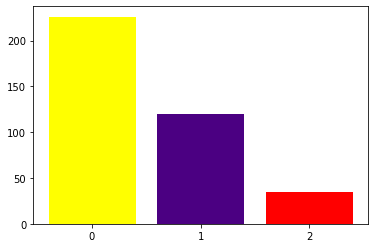

In [23]:
result_distribution = result_distribution.reset_index()
plt.bar(result_distribution['diff'], height=result_distribution['y_train'],color = ['yellow', 'indigo', 'red'])
plt.xticks(result_distribution['diff'])

<table>
  <tr>
    <th>Diagnosis</th>
    <th>Label</th>
  </tr>
  <tr>
    <td>benign(non-cancerous)</td>
    <td>0</td>
  </tr>
  <tr>
    <td>malignant (cancerous)</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Misclassified</td>
    <td>2</td>
  </tr>
</table>

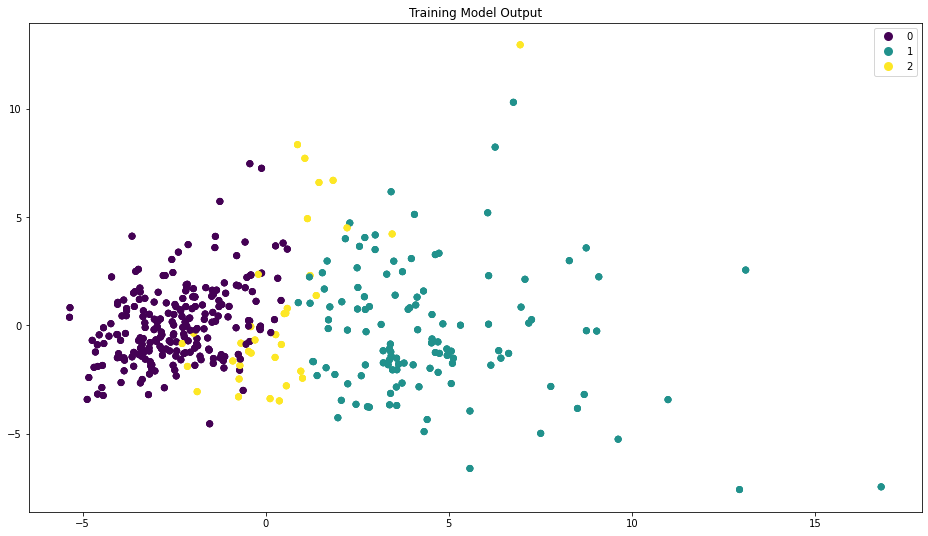

In [24]:
# plotting prediction

x_train_PCA = PCA(n_components=2).fit_transform(X_train)

plt.figure(figsize=(16, 9))

label1 = plt.scatter(x=x_train_PCA[:,0], y=x_train_PCA[:, 1], c=prediction_comparison['diff'], label='label1')
label2 = plt.scatter(x=x_train_PCA[:,0], y=x_train_PCA[:, 1], c=prediction_comparison['diff'], label='label2')
label2 = plt.scatter(x=x_train_PCA[:,0], y=x_train_PCA[:, 1], c=prediction_comparison['diff'], label='label3')
lp = lambda i: plt.plot([],color=label1.cmap(label1.norm(i)), ms=np.sqrt(81), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
plt.legend(handles=[lp(i) for i in np.unique(prediction_comparison["diff"])])
plt.title("Training Model Output")
plt.show()

<table>
  <tr>
    <th>Diagnosis</th>
    <th>Label</th>
  </tr>
  <tr>
    <td>benign(non-cancerous)</td>
    <td>0</td>
  </tr>
  <tr>
    <td>malignant (cancerous)</td>
    <td>1</td>
  </tr>
  <tr>
    <td>Misclassified</td>
    <td>2</td>
  </tr>
</table>

**Model Results Analysis:** Based on the plotting of Misclassified data mostly located in between two clusters

---

#### **Model Performance Evaluation**

In [25]:
from IPython.display import display, Markdown
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_train, y_pred)

display(Markdown(f''' **Confusion Matrix Analysis**
<table>
  <tr>
    <th></th>
    <th>benign</th>
    <th>malignant</th>
  </tr>
  <tr>
    <td><b>benign</b></td>
    <td>{cm[0][0]}</td>
    <td>{cm[0][1]}</td>
  </tr>
  <tr>
    <td><b>malignant</b></td>
    <td>{cm[1][0]}</td>
    <td>{cm[1][1]}</td>
  </tr>
</table>'''))

 **Confusion Matrix Analysis**
<table>
  <tr>
    <th></th>
    <th>benign</th>
    <th>malignant</th>
  </tr>
  <tr>
    <td><b>benign</b></td>
    <td>226</td>
    <td>10</td>
  </tr>
  <tr>
    <td><b>malignant</b></td>
    <td>25</td>
    <td>120</td>
  </tr>
</table>

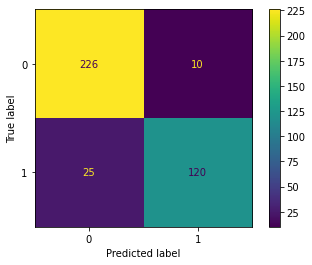

In [26]:
ConfusionMatrixDisplay(cm).plot()

AUC: 0.8926066627703098


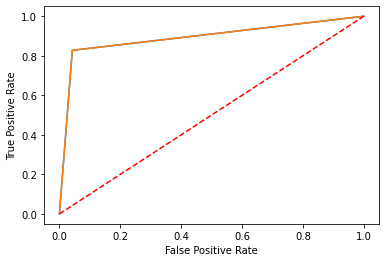

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

auc = roc_auc_score(y_train, y_pred)
fpr, tpr, _ = roc_curve(y_train, y_pred, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color = "red", linestyle = "--")
print(f'AUC: {auc}')

In [28]:
from sklearn import metrics
y_train = np.array(y_train).flatten()

**Rand Index**
- The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings
-  Lower values indicate different labelings, similar clusterings have a high (adjusted or unadjusted) Rand index, 1.0 is the perfect match score. The score range is [0, 1].

In [29]:
_rand_score = metrics.rand_score(np.array(y_train).flatten(), y_pred)
print(f'Rand Index: {round(_rand_score,2)} or {round(_rand_score*100, 2)}%')

Rand Index: 0.83 or 83.27%


**Rand Index Analysis:** With the given result, it shows that the model classified or clustered the label accurately about 83%.

---

 **Homogeneity, completeness and V-measure**
- **homogeneity:** each cluster contains only members of a single class.
- **completeness:** all members of a given class are assigned to the same cluster.

We can turn those concept as scores homogeneity_score and completeness_score. **Both are bounded below by 0.0 and above by 1.0 (higher is better)**

In [30]:
_homogeneity_score = metrics.homogeneity_score(y_train, y_pred)

In [31]:
_completeness_score = metrics.completeness_score(y_train, y_pred)

In [32]:
_v_measure_score = metrics.v_measure_score(y_train, y_pred)


In [33]:
print(f'''
Homogeneity Score: {round(_homogeneity_score, 2)}
Completeness Score: {round(_completeness_score, 2)}
V Measure Score: {round(_v_measure_score, 2)}
''')


Homogeneity Score: 0.54
Completeness Score: 0.56
V Measure Score: 0.55



- Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.

- Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of *homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.*

- **No assumption is made on the cluster structure**: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes

---

**Fowlkes-Mallows scores**

In [34]:
metrics.fowlkes_mallows_score(y_train, y_pred)

0.8447799824583938

- Random (uniform) label assignments have a FMI score close to 0.0 for any value of n_clusters and n_samples (which is not the case for raw Mutual Information or the V-measure for instance).

- Upper-bounded at 1: Values close to zero indicate two label assignments that are largely independent, while values close to one indicate significant agreement. Further, values of exactly 0 indicate purely independent label assignments and a FMI of exactly 1 indicates that the two label assignments are equal (with or without permutation).

- No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

---

**Silhouette Coefficient**
- The score is bounded between **-1** for incorrect clustering and **+1** for highly dense clustering. **Scores around zero indicate overlapping clusters.**

- The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

In [35]:
_silhouette_score = metrics.silhouette_score(X_train, k_means.labels_, metric='euclidean')

In [36]:
display(Markdown(f''' **Silhouette Score**: {round(_silhouette_score, 2)}
- indicate overlapping clusters (shown in graph below)
'''))

 **Silhouette Score**: 0.35
- indicate overlapping clusters (shown in graph below)


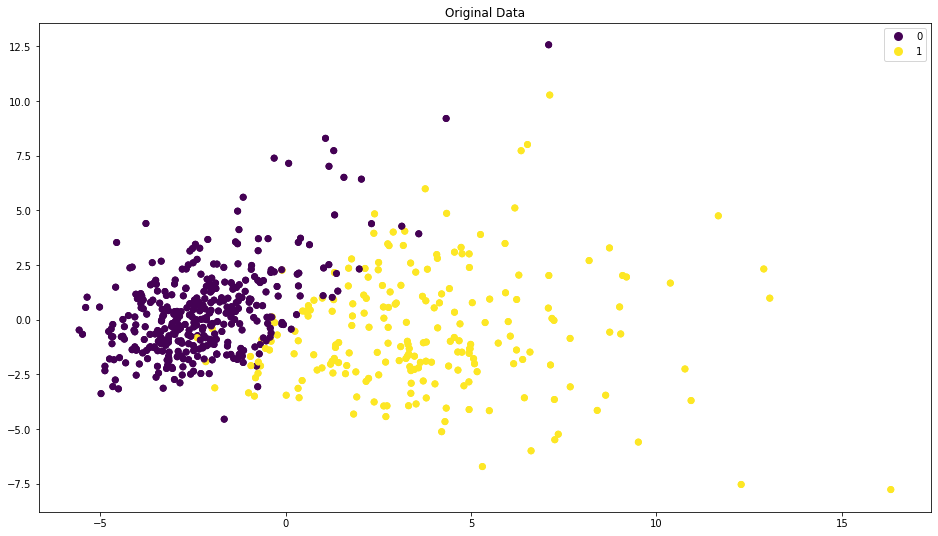

In [37]:
plt.figure(figsize=(16, 9))

label1 = plt.scatter(x=X_bc_in_PCA[:,0], y=X_bc_in_PCA[:, 1], c=Y_breast_cancer_df['diagnosis_T'], label='label1')
label2 = plt.scatter(x=X_bc_in_PCA[:,0], y=X_bc_in_PCA[:, 1], c=Y_breast_cancer_df['diagnosis_T'], label='label2')
lp = lambda i: plt.plot([],color=label1.cmap(label1.norm(i)), ms=np.sqrt(81), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
plt.legend(handles=[lp(i) for i in np.unique(Y_breast_cancer_df["diagnosis_T"])])
plt.title("Original Data")
plt.show()

---
### Model Testing


In [38]:
y_test_pred = k_means.predict(X_test)
y_test_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [39]:
test_comparison_data = {'y_test': np.array(y_test).flatten(), 'y_test_pred': y_test_pred}
test_prediction_comparison = pd.DataFrame(data = test_comparison_data)
test_prediction_comparison.loc[test_prediction_comparison['y_test'] == test_prediction_comparison['y_test_pred'], 'diff'] = test_prediction_comparison['y_test']  
test_prediction_comparison.loc[test_prediction_comparison['y_test'] != test_prediction_comparison['y_test_pred'], 'diff'] = 2
test_prediction_comparison

,y_test,y_test_pred,diff
0,0.0,0,0.0
1,1.0,1,1.0
2,1.0,1,1.0
3,0.0,0,0.0
4,0.0,0,0.0
...,...,...,...
183,1.0,1,1.0
184,1.0,1,1.0
185,1.0,1,1.0
186,0.0,1,2.0


In [40]:
x_test_PCA = PCA(n_components=2).fit_transform(X_test)

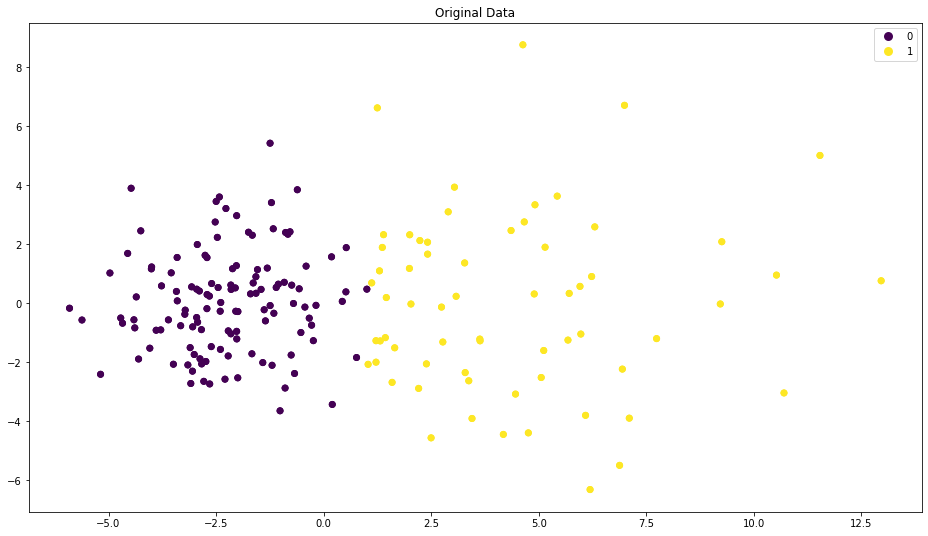

In [41]:
plt.figure(figsize=(16, 9))

label1 = plt.scatter(x=x_test_PCA[:,0], y=x_test_PCA[:, 1], c=test_prediction_comparison['y_test_pred'], label='label1')
label2 = plt.scatter(x=x_test_PCA[:,0], y=x_test_PCA[:, 1], c=test_prediction_comparison['y_test_pred'], label='label2')
lp = lambda i: plt.plot([],color=label1.cmap(label1.norm(i)), ms=np.sqrt(81), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
plt.legend(handles=[lp(i) for i in np.unique(test_prediction_comparison["y_test"])])
plt.title("Original Data")
plt.show()

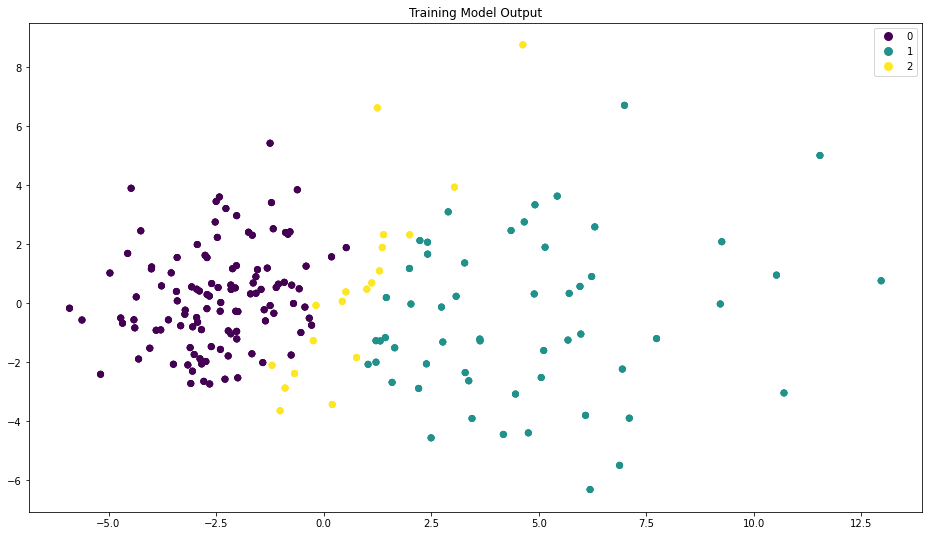

In [42]:


plt.figure(figsize=(16, 9))

label1 = plt.scatter(x=x_test_PCA[:,0], y=x_test_PCA[:, 1], c=test_prediction_comparison['diff'], label='label1')
label2 = plt.scatter(x=x_test_PCA[:,0], y=x_test_PCA[:, 1], c=test_prediction_comparison['diff'], label='label2')
label3 = plt.scatter(x=x_test_PCA[:,0], y=x_test_PCA[:, 1], c=test_prediction_comparison['diff'], label='label3')
lp = lambda i: plt.plot([],color=label1.cmap(label1.norm(i)), ms=np.sqrt(81), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
plt.legend(handles=[lp(i) for i in np.unique(test_prediction_comparison["diff"])])
plt.title("Training Model Output")
plt.show()

In [43]:
test_cm = confusion_matrix(y_test, y_test_pred)

display(Markdown(f''' **Confusion Matrix Analysis**
<table>
  <tr>
    <th></th>
    <th>benign</th>
    <th>malignant</th>
  </tr>
  <tr>
    <td><b>benign</b></td>
    <td>{test_cm[0][0]}</td>
    <td>{test_cm[0][1]}</td>
  </tr>
  <tr>
    <td><b>malignant</b></td>
    <td>{test_cm[1][0]}</td>
    <td>{test_cm[1][1]}</td>
  </tr>
</table>'''))

 **Confusion Matrix Analysis**
<table>
  <tr>
    <th></th>
    <th>benign</th>
    <th>malignant</th>
  </tr>
  <tr>
    <td><b>benign</b></td>
    <td>113</td>
    <td>8</td>
  </tr>
  <tr>
    <td><b>malignant</b></td>
    <td>11</td>
    <td>56</td>
  </tr>
</table>

In [44]:
test_rand_score = metrics.rand_score(np.array(y_test).flatten(), y_test_pred)
print(f'Rand Index: {round(test_rand_score,2)} or {round(test_rand_score,2)*100}%')

Rand Index: 0.82 or 82.0%


---

### Training & Test set results comparison

In [45]:

class confusion_matrix_analysis:
    def __init__(self, c_matrix) -> None:
        self.tp = c_matrix[0][0]
        self.tn = c_matrix[1][1]
        self.fp = c_matrix[1][0]
        self.fn = c_matrix[0][1]
        self.n_total = sum(np.array(c_matrix).flatten())

    def print_c_matrix(self):
        display(Markdown(f''' <table>
          <tr>
            <th></th>
            <th>benign</th>
            <th>malignant</th>
          </tr>
          <tr>
            <td><b>benign</b></td>
            <td>{self.tp}</td>
            <td>{self.fn}</td>
          </tr>
          <tr>
            <td><b>malignant</b></td>
            <td>{self.fp}</td>
            <td>{self.tn}</td>
          </tr>
        </table>'''))

    def accuracy(self):
        result = (self.tp + self.tn)/self.n_total
        return round(result, 3)
    
    def misclassification(self):
        result = 1- self.accuracy()
        return round(result, 3)

      

In [46]:
training_matrix = confusion_matrix_analysis(cm)

In [47]:
test_matrix = confusion_matrix_analysis(test_cm)

In [48]:
display(Markdown(f''' <table>
        <tr>
          <th></th>
          <th>Accuracy Score</th>
          <th>Misclassification Rate</th>
          <th>Rand Index</th>
        </tr>
        <tr>
          <td><b>Training Set</b></td>
          <td>{training_matrix.accuracy()}</td>
          <td>{training_matrix.misclassification()}</td>
          <td>{round(_rand_score, 3)}</td>
        </tr>
        <tr>
          <td><b>Test Set</b></td>
          <td>{test_matrix.accuracy()}</td>
          <td>{test_matrix.misclassification()}</td>
          <td>{round(test_rand_score, 3)}</td
        </tr>
    </table>'''))

 <table>
        <tr>
          <th></th>
          <th>Accuracy Score</th>
          <th>Misclassification Rate</th>
          <th>Rand Index</th>
        </tr>
        <tr>
          <td><b>Training Set</b></td>
          <td>0.908</td>
          <td>0.092</td>
          <td>0.833</td>
        </tr>
        <tr>
          <td><b>Test Set</b></td>
          <td>0.899</td>
          <td>0.101</td>
          <td>0.817</td
        </tr>
    </table>

---

##### Step 5: Result and Conclusion

1. K-means algorithm under clustering was used in building the model. With the given dataset of breast cancer and the target output of 2 classes benign and malignant, clustering is one of the algorithms for predicting the two results.
2. After doing some Exploratory Data Analysis and Data Wrangling, we were able to see that the two classes really clustered.
3. With the given result of the model in both the training and test set, there is a good output result. Based on the result in the table above, there is about a 90% accuracy rate and only 9% to 10% of misclassification.
4. There is also a high rand index of about 83% for the training set and 81% for the test set. 
5. Overall the model does really well in classifying the target variables.